# Earthquakes 1990-2023


In [15]:
%matplotlib inline

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('data/Earthquakes-1990-2023.csv', engine='pyarrow')

In [18]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [19]:
df.shape

(3445751, 12)

In [20]:
df.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [21]:
df.describe(include='object')

,place,status,data_type,state
count,3445751,3445751,3445751,3445751
unique,531130,6,25,858
top,"6 km W of Cobb, California",reviewed,earthquake,California
freq,24202,3224825,3361846,866675


## Descriptive statistics

In [22]:
df['significance'].mean(), df['significance'].median(), df['significance'].std(), df['significance'].min(), df['significance'].max()

(np.float64(74.00973459776984),
 np.float64(33.0),
 np.float64(101.63641469964334),
 np.int64(0),
 np.int64(2910))

In [23]:
df['magnitudo'].mean(), df['magnitudo'].median(), df['magnitudo'].std(), df['magnitudo'].min(), df['magnitudo'].max()

(np.float64(1.7740761405603154),
 np.float64(1.46),
 np.float64(1.291055102657228),
 np.float64(-9.99),
 np.float64(9.1))

In [24]:
df['depth'].mean(), df['depth'].median(), df['depth'].std(), df['depth'].min(), df['depth'].max()

(np.float64(22.85387383541199),
 np.float64(7.7),
 np.float64(54.849379345279466),
 np.float64(-10.0),
 np.float64(735.8))

## Clean up data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype              
---  ------        -----              
 0   time          int64              
 1   place         object             
 2   status        object             
 3   tsunami       int64              
 4   significance  int64              
 5   data_type     object             
 6   magnitudo     float64            
 7   state         object             
 8   longitude     float64            
 9   latitude      float64            
 10  depth         float64            
 11  date          datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(4)
memory usage: 315.5+ MB


In [26]:
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [27]:
duplicate_rows = df[df.duplicated(keep='first')]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 16869


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
9214,636249654650,"3 km E of Mammoth Lakes, California",reviewed,0,42,earthquake,1.66,California,-118.933667,37.647000,3.816000,1990-03-01 00:00:54.650000+00:00
9216,636249667890,"4km N of Claremont, CA",reviewed,0,70,earthquake,2.13,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:07.890000+00:00
9218,636249694400,"4km N of Claremont, CA",reviewed,0,62,earthquake,2.00,California,-117.717000,34.133000,4.275000,1990-03-01 00:01:34.400000+00:00
9220,636249712400,"5km NNE of Claremont, CA",reviewed,0,22,earthquake,1.20,California,-117.705000,34.144000,5.702000,1990-03-01 00:01:52.400000+00:00
9222,636249724170,"4km N of Claremont, CA",reviewed,0,160,earthquake,3.22,California,-117.714000,34.130000,5.622000,1990-03-01 00:02:04.170000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3386776,1677800561550,"6km WNW of Cobb, CA",automatic,0,2,earthquake,0.36,California,-122.790169,38.834667,1.590000,2023-03-02 23:42:41.550000+00:00
3386778,1677800571801,western Texas,reviewed,0,62,earthquake,2.00,western Texas,-104.407287,31.674925,7.185596,2023-03-02 23:42:51.801000+00:00
3386780,1677800938538,"49 km N of Petersville, Alaska",reviewed,0,35,earthquake,1.50,Alaska,-150.759600,62.942400,109.700000,2023-03-02 23:48:58.538000+00:00
3386782,1677801044380,"83 km NNW of Karluk, Alaska",reviewed,0,0,earthquake,0.04,Alaska,-155.069167,58.246000,4.900000,2023-03-02 23:50:44.380000+00:00


In [28]:
# Clean data
df.drop_duplicates(keep='first', inplace=True)

In [29]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [30]:
df['time'] = pd.to_datetime(df['time'], format='mixed').dt.time

In [31]:
df['year'] = df['date'].dt.year

In [32]:
df['month'] = df['date'].dt.month

In [33]:
df['day'] = df['date'].dt.day

## Plots and analysis

### Number of earthquake events in different states

In [34]:
state_counts = df['state'].value_counts()

<Axes: title={'center': 'All Earthquake'}, xlabel='State', ylabel='Earthquakes'>

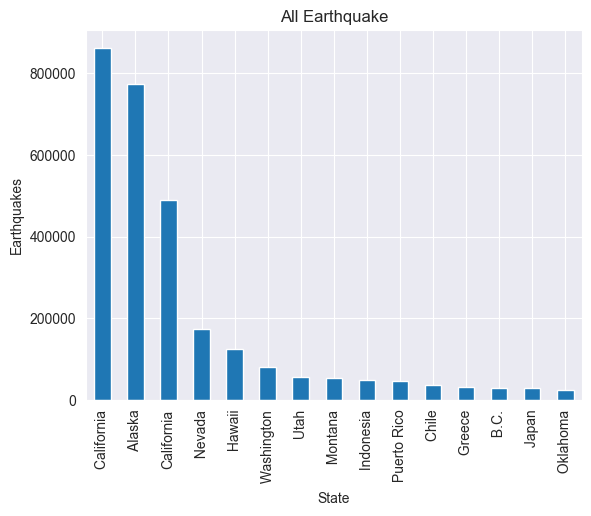

In [35]:
state_counts.head(15).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='All Earthquake')

In [36]:
significant_earthquakes = df['state'][df['significance'] > df['significance'].max() // 2].value_counts()

<Axes: title={'center': 'Significant Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

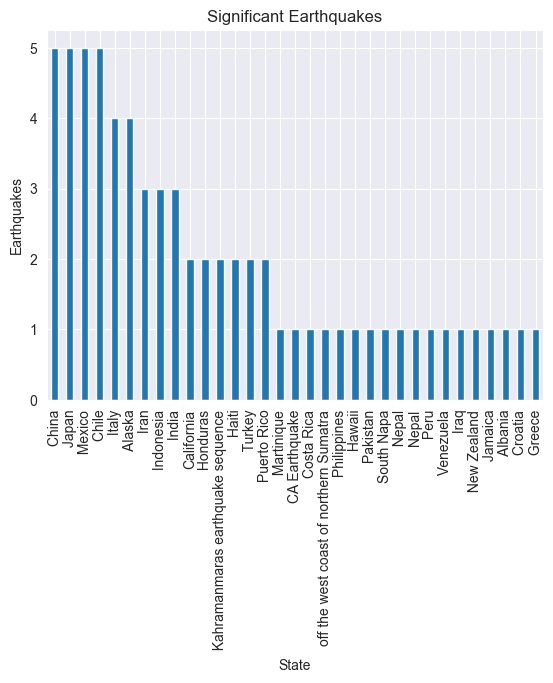

In [37]:
significant_earthquakes.plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Significant Earthquakes')

In [38]:
big_magnitudo_earthquakes = df['state'][df['magnitudo'] >= 6].value_counts()

<Axes: title={'center': 'Powerful Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

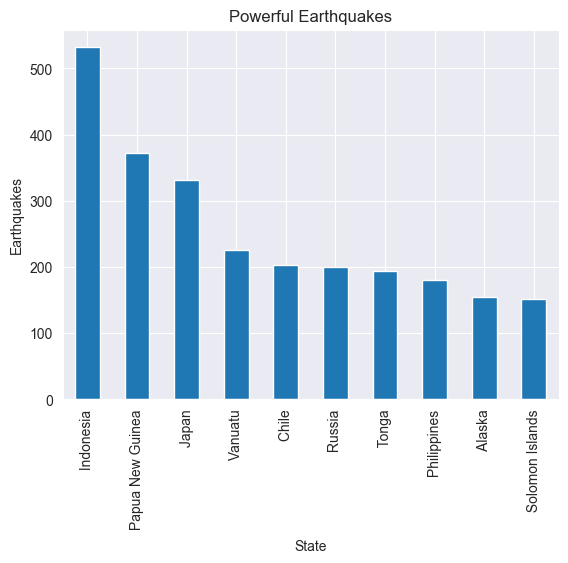

In [39]:
big_magnitudo_earthquakes.head(10).plot(kind='bar', xlabel='State', ylabel='Earthquakes', title='Powerful Earthquakes')

In [40]:
small_magnitudo_earthquakes = df['state'][df['magnitudo'] <= 4].value_counts()

<Axes: title={'center': 'Small Earthquakes'}, xlabel='State', ylabel='Earthquakes'>

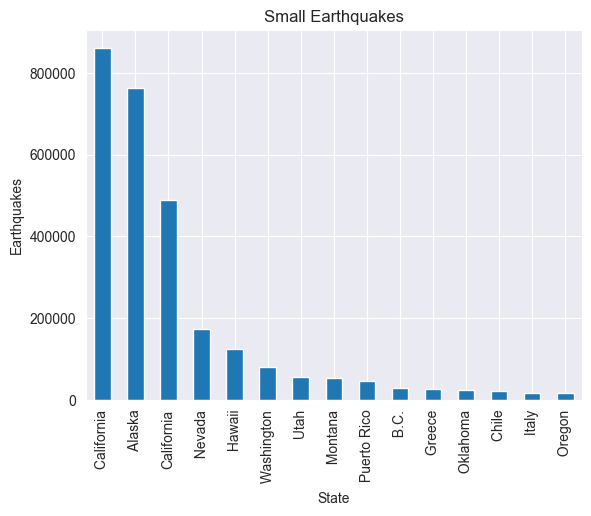

In [41]:
small_magnitudo_earthquakes.head(15).plot(kind='bar', xlabel='State', ylabel='Earthquakes',
                                          title='Small Earthquakes')

### The number of earthquakes at all time

<Axes: title={'center': 'Earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

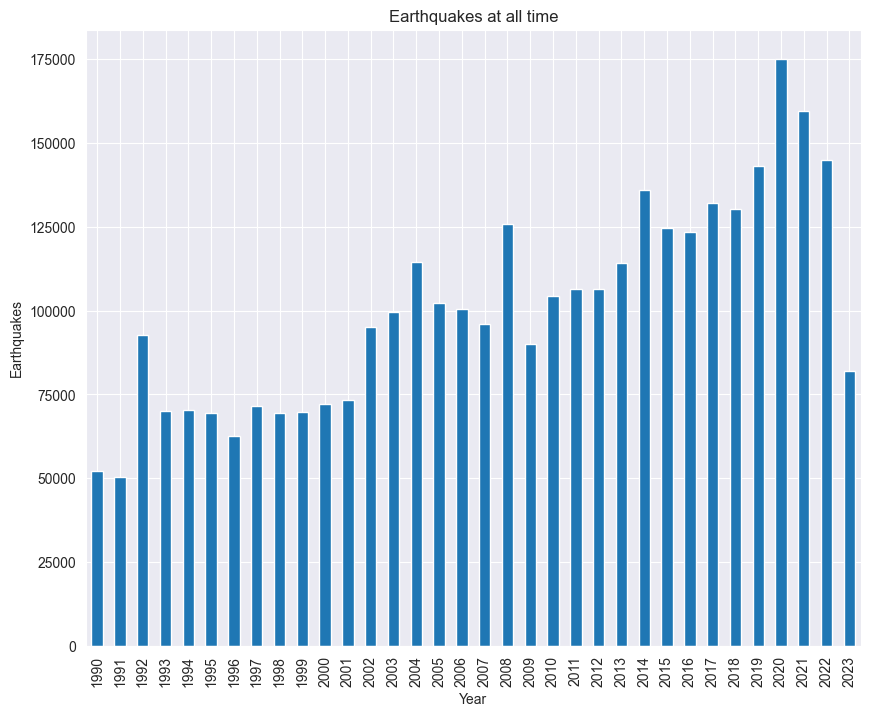

In [42]:
df['year'].value_counts(sort=False).plot(kind='bar', xlabel='Year', ylabel='Earthquakes', figsize=(10, 8),
                                         title='Earthquakes at all time')

<Axes: title={'center': 'Powerful earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

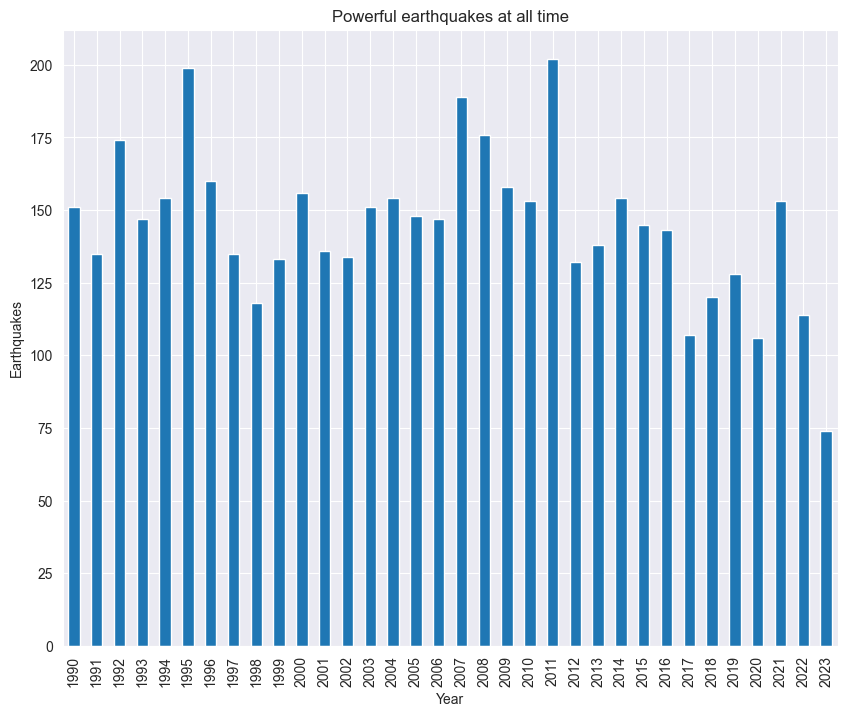

In [43]:
df['year'][df['magnitudo'] >= 6].value_counts(sort=False).plot(kind='bar', xlabel='Year', ylabel='Earthquakes',
                                                               figsize=(10, 8),
                                                               title='Powerful earthquakes at all time')

<Axes: title={'center': 'Significant earthquakes at all time'}, xlabel='Year', ylabel='Earthquakes'>

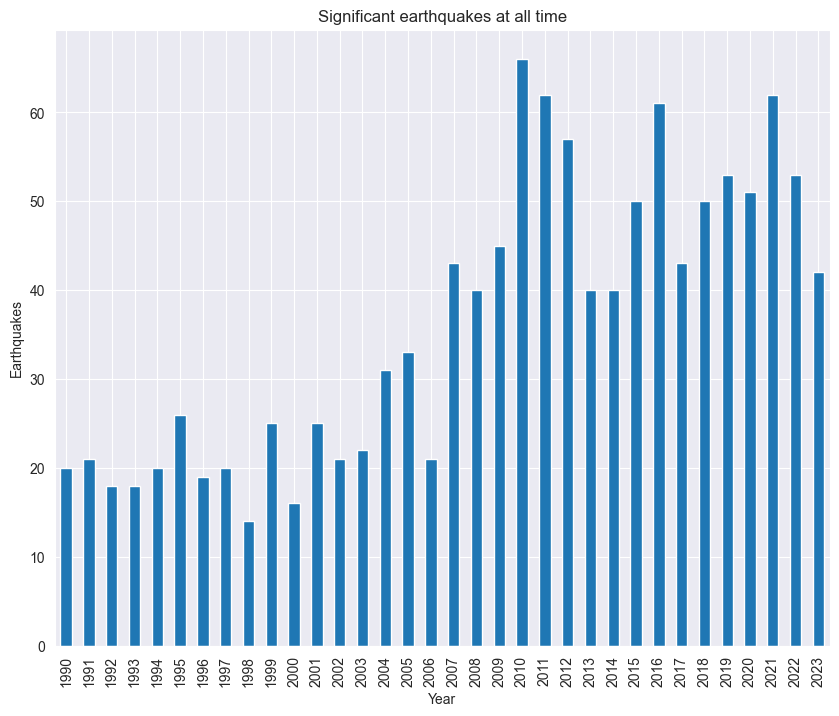

In [44]:
df['year'][df['significance'] >= df['significance'].max() // 4].value_counts(sort=False).plot(kind='bar', xlabel='Year',ylabel='Earthquakes', figsize=(10, 8), title='Significant earthquakes at all time')

### Distribution by magnitude, significance and depth


<Axes: title={'center': 'Magnitude distribution'}, xlabel='Magnitude', ylabel='Frequency'>

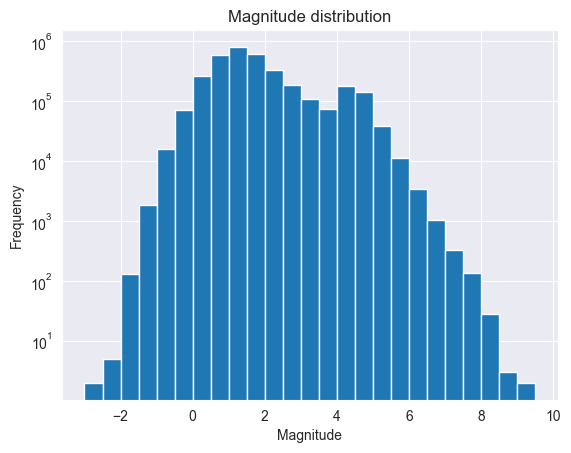

In [45]:
df['magnitudo'].plot(kind='hist', bins=np.arange(-3., 10., 0.5), log=True, title='Magnitude distribution',
                     xlabel='Magnitude')

<Axes: title={'center': 'Significance distribution'}, xlabel='Significance', ylabel='Frequency'>

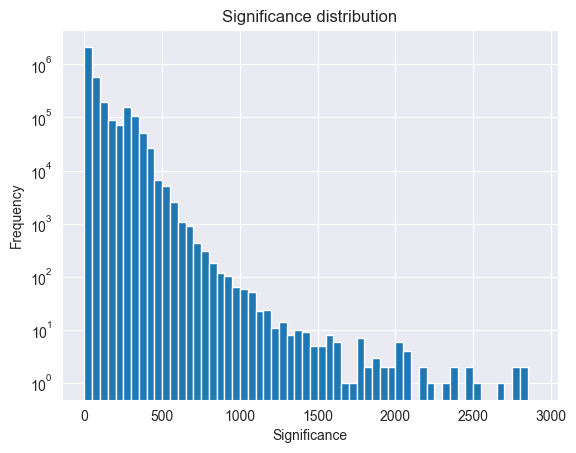

In [46]:
df['significance'].plot(kind='hist', bins=np.arange(0., df['significance'].max(), 50), log=True,
                        title='Significance distribution', xlabel='Significance')

<Axes: title={'center': 'Depth distribution'}, xlabel='Depth', ylabel='Frequency'>

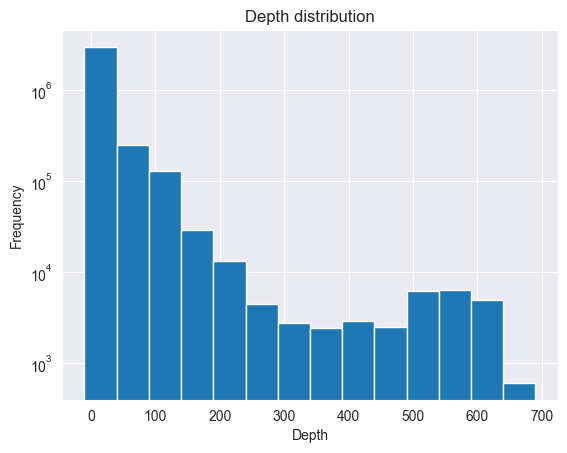

In [47]:
df['depth'].plot(kind='hist', bins=np.arange(df['depth'].min(), df['depth'].max(), 50), log=True,
                 title='Depth distribution',
                 xlabel='Depth')

### Dependence of significance on magnitude

Text(0.5, 1.0, 'Dependence of significance on magnitude')

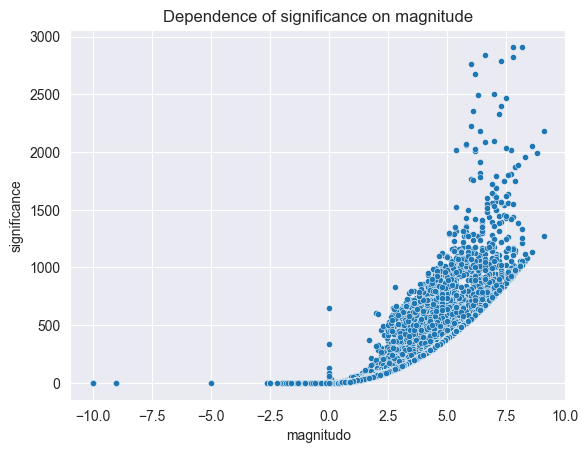

In [48]:
sns.scatterplot(data=df, y='significance', x='magnitudo', s=20).set_title('Dependence of significance on magnitude')

### Dependence of depth on magnitude

Text(0.5, 1.0, 'Dependence of depth on magnitude')

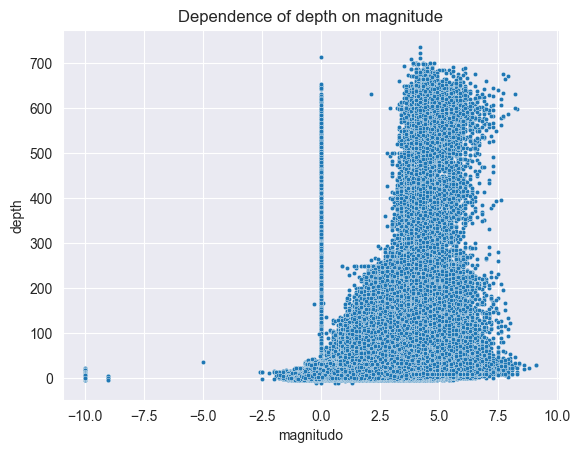

In [49]:
sns.scatterplot(data=df, y='depth', x='magnitudo', s=10).set_title('Dependence of depth on magnitude')

### The trend of the quantile (80%) over time

Text(0.5, 1.0, 'Quantile trend of magnitude')

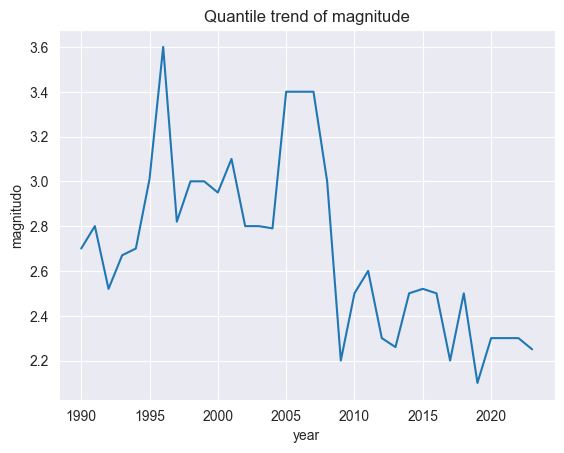

In [50]:
sns.lineplot(data=df.groupby('year').agg({'magnitudo': lambda x: x.quantile(0.8)}), x='year', y='magnitudo').set_title('Quantile trend of magnitude')

Text(0.5, 1.0, 'Quantile trend of significance')

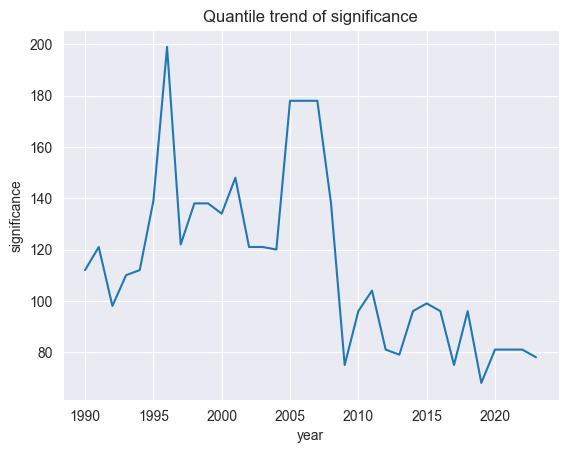

In [51]:
sns.lineplot(data=df.groupby('year').agg({'significance': lambda x: x.quantile(0.8)}), x='year', y='significance').set_title(
    'Quantile trend of significance')

Text(0.5, 1.0, 'Quantile trend of depth')

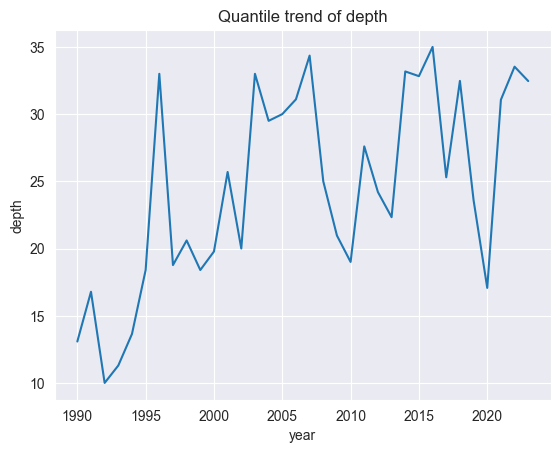

In [52]:
sns.lineplot(data=df.groupby('year').agg({'depth': lambda x: x.quantile(0.8)}), x='year', y='depth').set_title('Quantile trend of depth')

### The trend of the maximal value over time

Text(0.5, 1.0, 'Max trend of magnitude')

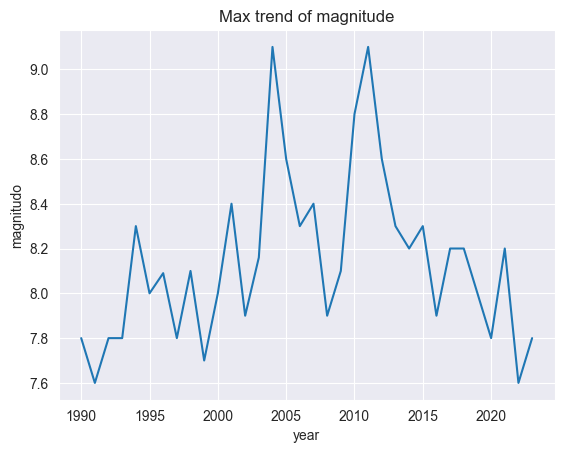

In [53]:
sns.lineplot(data=df.groupby('year').agg({'magnitudo':'max'}), x='year', y='magnitudo').set_title('Max trend of magnitude')

Text(0.5, 1.0, 'Max trend of significance')

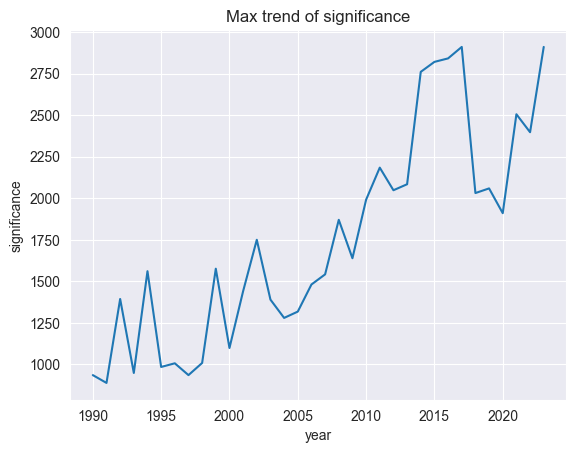

In [54]:
sns.lineplot(data=df.groupby('year').agg({'significance':'max'}), x='year', y='significance').set_title(
    'Max trend of significance')

Text(0.5, 1.0, 'Max trend of depth')

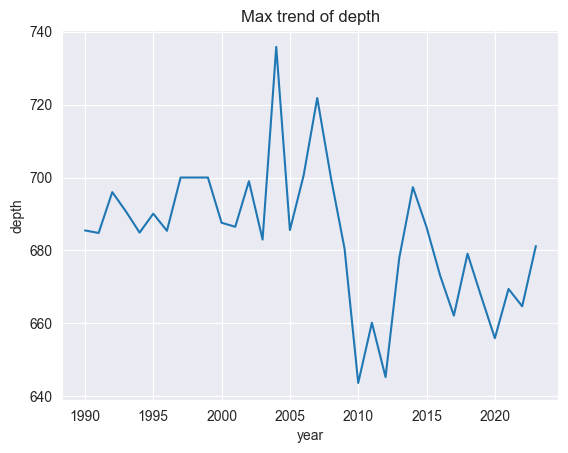

In [55]:
sns.lineplot(data=df.groupby('year').agg({'depth':'max'}), x='year', y='depth').set_title('Max trend of depth')

## Detailed overview of plots

some overview

blah blah blah blah blah


## Hypothesis

**Tsunamis are more destructive than earthquakes.**

**Destructive definition**

$destructive = \log(\max(1, magnitudo))*significance$

In [56]:
df['destructive'] = df['magnitudo'].apply(lambda x: np.log10(max(1, x))) * df['significance']

In [57]:
df[['state', 'magnitudo', 'depth', 'significance', 'destructive']].head()

,state,magnitudo,depth,significance,destructive
0,Alaska,2.50,30.100,96,38.202241
1,Hawaii,1.41,6.585,31,4.625792
2,California,1.11,3.220,19,0.861137
3,California,0.98,-0.584,15,0.000000
4,California,2.95,16.122,134,62.956150


### Distribution

<Axes: title={'center': 'Destructive distribution'}, xlabel='Destructive', ylabel='Frequency'>

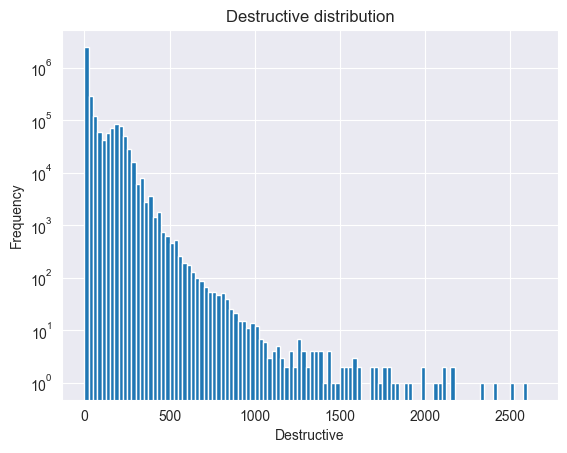

In [58]:
df['destructive'].plot(kind='hist', bins=np.arange(0, df['destructive'].max(), 25), log=True, title='Destructive distribution', xlabel='Destructive')

<Axes: title={'center': 'Destructive distribution'}, xlabel='Destructive', ylabel='Frequency'>

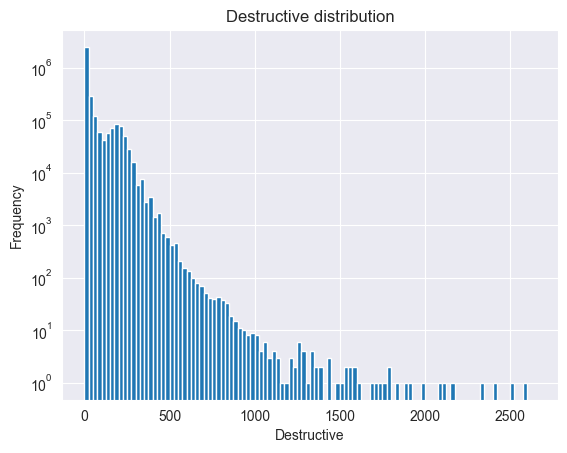

In [59]:
df['destructive'][df['tsunami'] == 0].plot(kind='hist', bins=np.arange(0, df['destructive'].max(), 25), log=True, title='Destructive distribution', xlabel='Destructive')

<Axes: title={'center': 'Destructive distribution'}, xlabel='Destructive', ylabel='Frequency'>

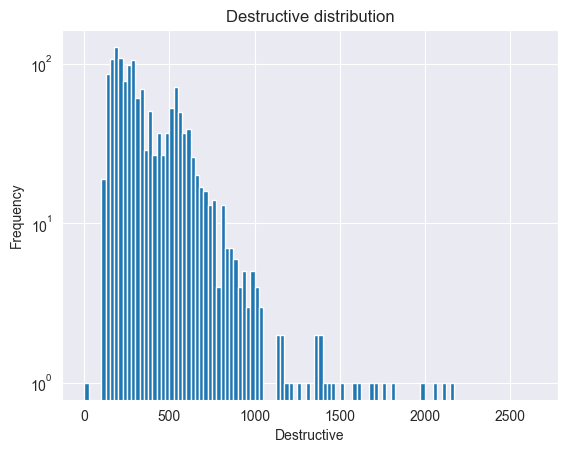

In [60]:
df['destructive'][df['tsunami'] == 1].plot(kind='hist', bins=np.arange(0, df['destructive'].max(), 25), log=True, title='Destructive distribution', xlabel='Destructive')

### Analysis

Text(0.5, 1.0, 'Mean of destructive')

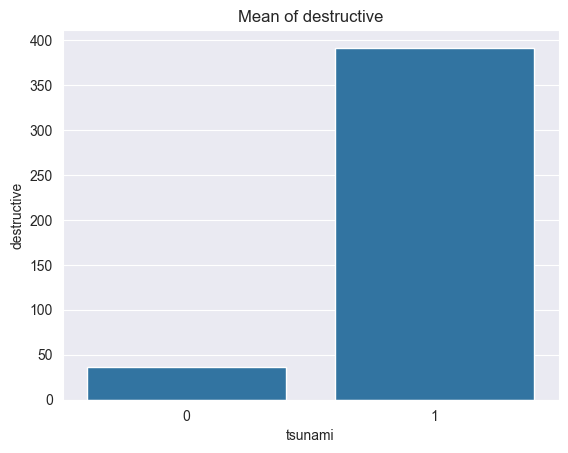

In [61]:
sns.barplot(data=df.groupby('tsunami').agg({'destructive': 'mean'}), x='tsunami', y='destructive').set_title('Mean of destructive')

*As we can see, on average tsunami is more destructive than ordinary earthquakes.*

Text(0.5, 1.0, 'Quantile (50%) of destructive')

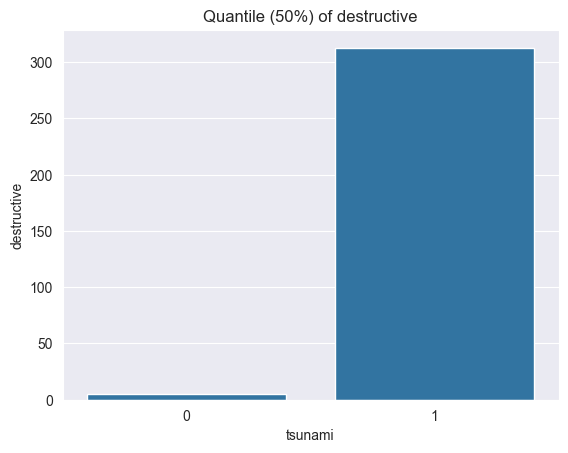

In [62]:
sns.barplot(data=df.groupby('tsunami').agg({'destructive': lambda x: x.quantile(0.5)}), x='tsunami', y='destructive').set_title('Quantile (50%) of destructive')

*Here we see, 50 percent of tsunamis are more destructive than earthquakes. Also, we see that destructive of 50 percent of earthquakes less than 50 points.*

Text(0.5, 1.0, 'Quantile (90%) of destructive')

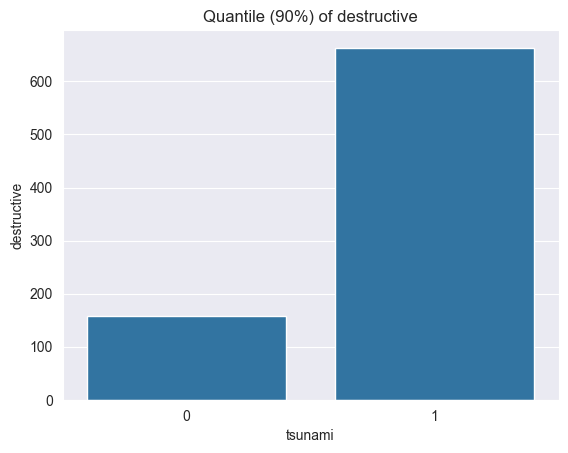

In [63]:
sns.barplot(data=df.groupby('tsunami').agg({'destructive': lambda x: x.quantile(0.9)}), x='tsunami', y='destructive').set_title('Quantile (90%) of destructive')

*In this case, the 10 percent of tsunamis are more destructive than earthquakes*

Text(0.5, 1.0, 'Maximal value of destructive')

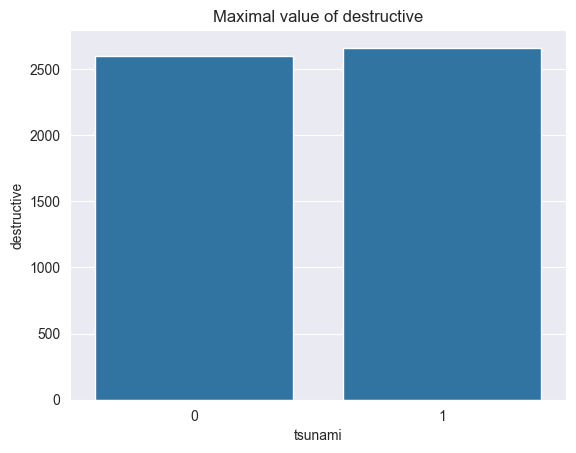

In [64]:
sns.barplot(data=df.groupby('tsunami').agg({'destructive': 'max'}), x='tsunami', y='destructive').set_title('Maximal value of destructive')

*The most destructive of the recorded tsunamis was more powerful than the most destructive of the recorded earthquakes.*

In [65]:
delta_max = df['destructive'][df['tsunami'] == 1].max() - df['destructive'][df['tsunami'] == 0].max()

In [66]:
delta_max

np.float64(63.20301660731775)

### Some statistics for conclusion

In [67]:
tsunami = df[df['tsunami'] == 1]

<Axes: title={'center': 'The number of tsunamis in different states'}, ylabel='count'>

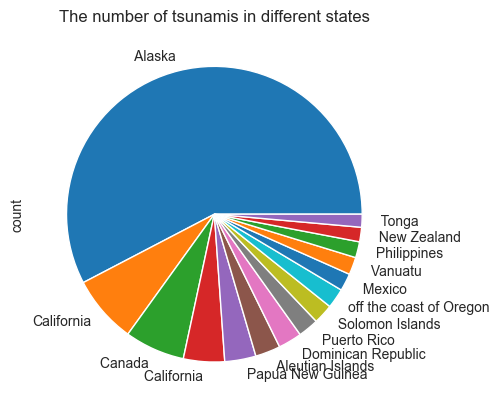

In [68]:
tsunami['state'].value_counts().head(15).plot(kind='pie', title='The number of tsunamis in different states')

<Axes: title={'center': 'The number of significance tsunamis in different states'}, ylabel='count'>

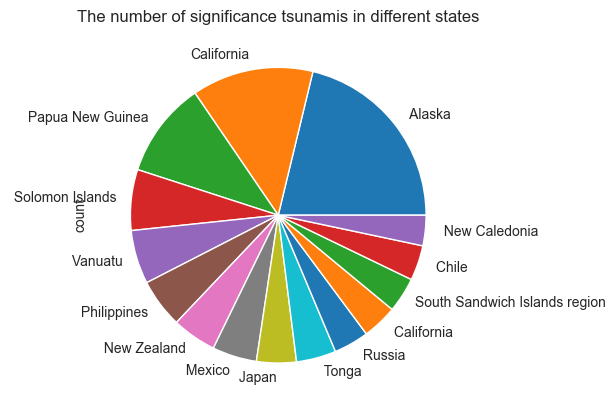

In [69]:
tsunami[tsunami['destructive'] >= tsunami['destructive'].mean()]['state'].value_counts().head(15).plot(kind='pie', title='The number of significance tsunamis in different states')

<Axes: title={'center': 'The number of destructive tsunamis in different states'}, ylabel='count'>

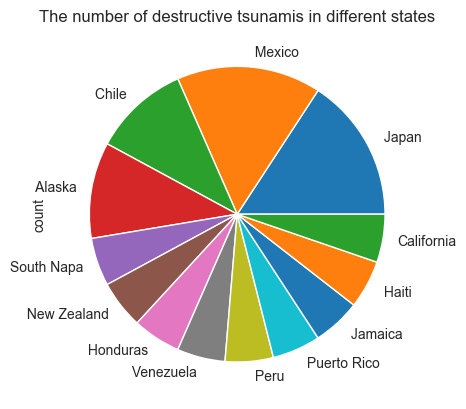

In [70]:
tsunami[tsunami['destructive'] >= tsunami['destructive'].max() // 2]['state'].value_counts().head(15).plot(kind='pie', title='The number of destructive tsunamis in different states')

## Hypothesis has been proved

some conclusion

**Why?**

- The most destructive earthquake was a tsunami. $\triangle max=63.2$ (**Maximal value of destructive** plot)
- The average tsunami is more destructive than the average earthquake. (**Mean of destructive** plot)
- The 90 percent of tsunamis are more destructive than the 10 percent of earthquakes. (**Quantile (90%) of destructive** plot)
